In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 87 kB 6.0 MB/s 
     |████████████████████████████████| 60.5 MB 1.3 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=0391ac4dba1b31e17a05f8daa22e5f48e0dc3cb285c50fe56e04eefcb45cf50f
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependen

# Read image

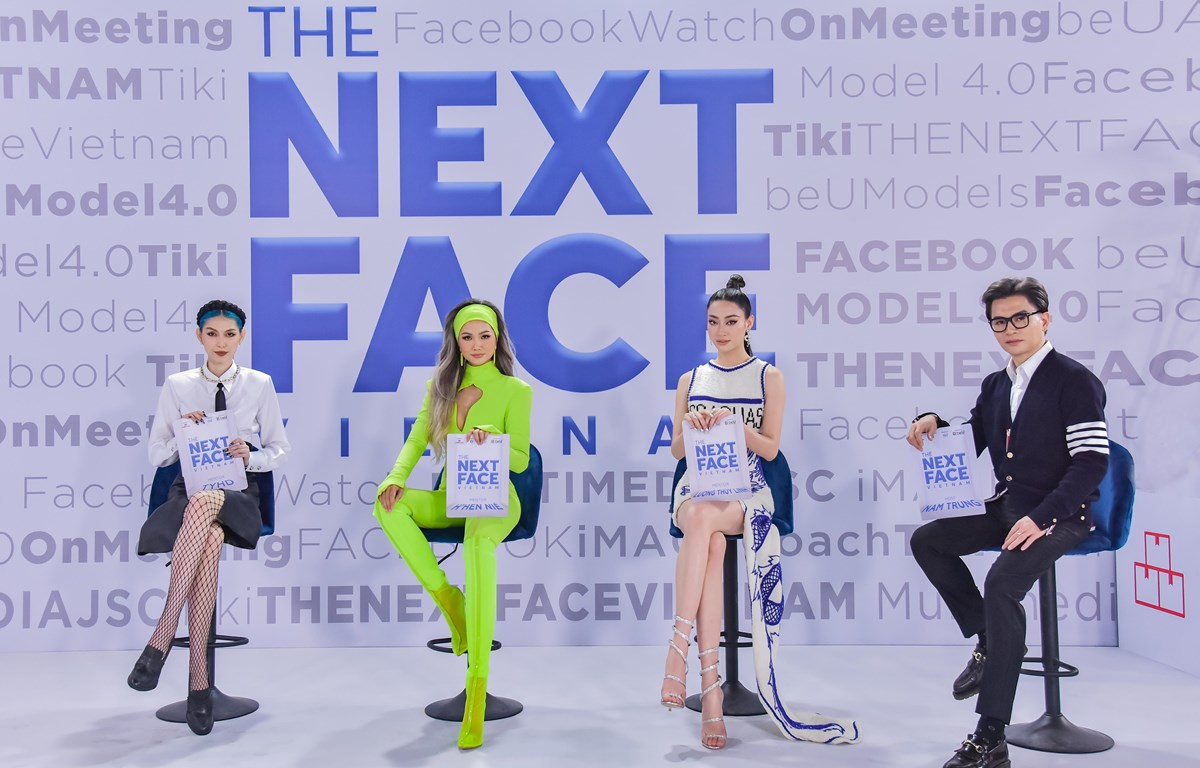

In [26]:
from mtcnn import MTCNN
import numpy as np
import cv2
from deepface import DeepFace
import os
from google.colab.patches import cv2_imshow

image_path = "/content/drive/MyDrive/gender-detection/1.jpeg"


detector = MTCNN()
# read input image
image_bgr = cv2.imread(image_path)
cv2_imshow(image_bgr)
height, width, _ = image_bgr.shape
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Face Detection and Gender Classification

Gender:  Woman
Gender:  Woman
Gender:  Man
Gender:  Woman


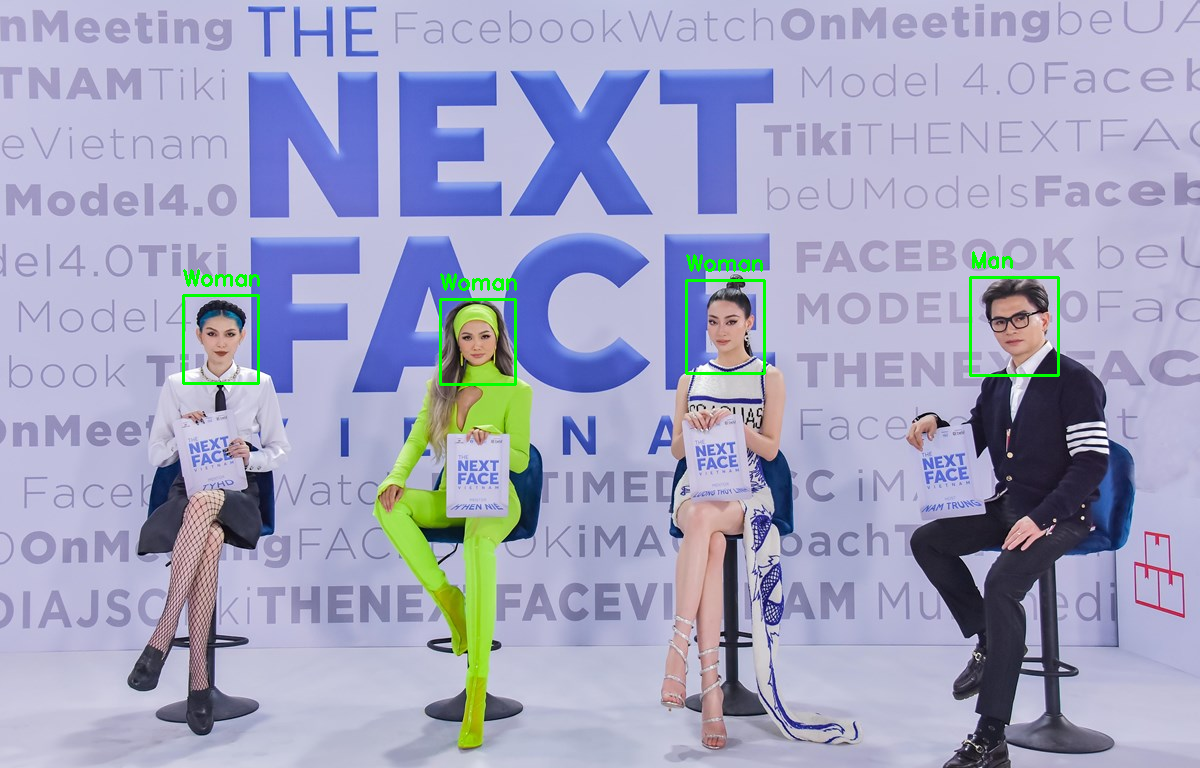

In [27]:
result = detector.detect_faces(image_rgb)

if not result:
    print("Cannot detect faces")
for idx, bboxes in enumerate(result):
    x, y, w, h = bboxes['box']
    
    startX = max(0, x-20)
    startY = max(0, y-20)
    endX = min(x+w+20, width)
    endY = min(y+h+20, height)


    face = image_bgr[startY: endY, startX: endX]
    cv2.imwrite(f'{idx}.jpg', face)
    gender = DeepFace.analyze(img_path = f'{idx}.jpg', actions = ['gender'])['gender']
    print("Gender: ", gender)

    cv2.rectangle(image_bgr, (startX, startY), (endX, endY), (0, 255, 0), 2)
    cv2.putText(image_bgr, gender, (startX, startY -10),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

cv2_imshow(image_bgr)